# Configuração do Ambiente e Introdução
## Análise de Dados de Verificações de Antecedentes para Compra de Armas

Este projeto visa realizar uma análise de clusterização em um dataset de verificações de antecedentes para compra de armas, utilizando Python 3.9+ em um ambiente virtual Anaconda. O objetivo é identificar padrões e realizar comparações entre diferentes modelos de clusterização.

## Configuração do Ambiente
- Python 3.9+
- Ambiente Virtual: Anaconda
- Bibliotecas: pandas, matplotlib, seaborn, scikit-learn


# Gerando arquivo de requerimentos e verificando o ambiente python

In [7]:
# Gerando arquivo de requerimentos
!pip freeze > requirements.txt

# Verificando a versão do Python
import sys
print(sys.version)


3.9.17 (main, Jul  5 2023, 21:05:34) 
[GCC 11.2.0]


## Carregamento e Análise Inicial dos Dados

Carregamos o dataset e realizamos uma análise exploratória inicial para entender as características e a distribuição dos dados.


In [8]:
# Carregando e visualizando os dados
import pandas as pd

df = pd.read_csv('nics-firearm-background-checks.csv')
df.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09,Alabama,10342.0,145.0,15421.0,12848.0,1156.0,1052,0.0,14.0,...,0.0,0.0,0.0,29.0,21.0,14.0,0.0,1.0,0.0,44556
1,2023-09,Alaska,188.0,10.0,2429.0,2543.0,262.0,197,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5922
2,2023-09,Arizona,9113.0,2014.0,14398.0,8239.0,1575.0,931,0.0,14.0,...,0.0,0.0,0.0,6.0,6.0,0.0,1.0,0.0,0.0,38189
3,2023-09,Arkansas,2139.0,181.0,5645.0,6108.0,437.0,466,6.0,8.0,...,0.0,0.0,0.0,6.0,13.0,2.0,0.0,0.0,0.0,17207
4,2023-09,California,28611.0,15559.0,33792.0,20548.0,4295.0,0,0.0,1.0,...,56.0,0.0,0.0,7289.0,3093.0,529.0,26.0,10.0,0.0,118625


## Pré-processamento dos Dados

O pré-processamento inclui a limpeza de dados, tratamento de valores faltantes e normalização, essenciais antes da etapa de clusterização.


In [9]:
from sklearn.preprocessing import StandardScaler

# Limpeza e normalização dos dados
df_clean = df[['handgun', 'long_gun', 'other', 'totals']].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)


## Clusterização

Utilizaremos os algoritmos K-Médias e DBScan para clusterizar os dados. O número ótimo de clusters será escolhido com base no índice de silhueta.


In [10]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Aplicando K-Médias
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)
silhouette_kmeans = silhouette_score(df_scaled, kmeans.labels_)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(df_scaled)
silhouette_dbscan = silhouette_score(df_scaled, dbscan.labels_) if len(set(dbscan.labels_)) > 1 else 'N/A'


/home/marcelo/anaconda3/envs/infnet/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Análise Comparativa e Medidas de Validação Adicionais

Comparamos os resultados dos dois modelos de clusterização e utilizamos outras medidas de validação para uma análise mais profunda.


In [11]:
# Comparação e validação adicional dos modelos
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


davies_bouldin_kmeans = davies_bouldin_score(df_scaled, kmeans.labels_)
calinski_harabasz_kmeans = calinski_harabasz_score(df_scaled, kmeans.labels_)

# DBSCAN, se aplicável
if 'silhouette_dbscan' != 'N/A':
    davies_bouldin_dbscan = davies_bouldin_score(df_scaled, dbscan.labels_)
    calinski_harabasz_dbscan = calinski_harabasz_score(df_scaled, dbscan.labels_)
    

print('K-Médias:\nSilhouette Score: {}\nDavies-Bouldin Score: {}\nCalinski-Harabasz Score: {}\n'.format(silhouette_kmeans, davies_bouldin_kmeans, calinski_harabasz_kmeans))


K-Médias:
Silhouette Score: 0.6468420832056749
Davies-Bouldin Score: 0.8130042680306496
Calinski-Harabasz Score: 4967.363956849882



## Visualização dos Clusters

Visualizações gráficas dos clusters para uma melhor compreensão dos padrões identificados.


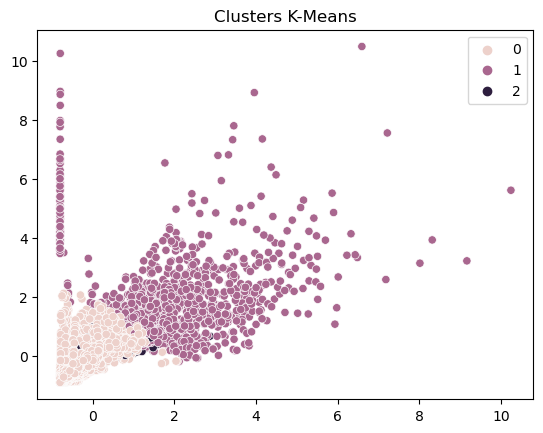

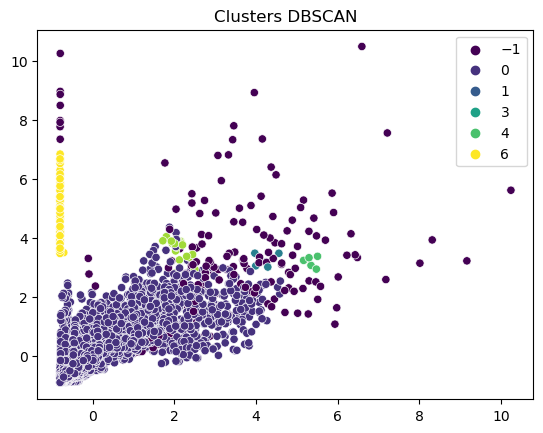

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização dos Clusters K-Means
sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue=kmeans.labels_)
plt.title('Clusters K-Means')
plt.show()

# Visualização dos Clusters DBSCAN, se aplicável
if len(set(dbscan.labels_)) > 1:
    sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue=dbscan.labels_, palette='viridis')
    plt.title('Clusters DBSCAN')
    plt.show()
else:
    print('DBSCAN não identificou clusters distintos.')

